# This is the title

This is some text

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

/Users/stephaniezhu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [249]:
df_mvp_2019 = pd.read_csv('mvp_data/mvp_2019.csv')

In [411]:
df_mvp_2019

,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,...,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,mvp_year,mvp_sl
0,Giannis Antetokounmpo,24,MIL,78.0,941.0,1010,0.932,72,32.8,27.7,...,5.9,1.3,1.5,0.578,0.256,0.729,14.4,0.292,2019,1
1,James Harden,29,HOU,23.0,776.0,1010,0.768,78,36.8,36.1,...,7.5,2.0,0.7,0.442,0.368,0.879,15.2,0.254,2019,1
2,Paul George,28,OKC,0.0,356.0,1010,0.352,77,36.9,28.0,...,4.1,2.2,0.4,0.438,0.386,0.839,11.9,0.201,2019,1
3,Nikola Jokić,23,DEN,0.0,212.0,1010,0.210,80,31.3,20.1,...,7.3,1.4,0.7,0.511,0.307,0.821,11.8,0.226,2019,1
4,Stephen Curry,30,GSW,0.0,175.0,1010,0.173,69,33.8,27.3,...,5.2,1.3,0.4,0.472,0.437,0.916,9.7,0.199,2019,1
5,Damian Lillard,28,POR,0.0,69.0,1010,0.068,80,35.5,25.8,...,6.9,1.1,0.4,0.444,0.369,0.912,12.1,0.205,2019,1
6,Joel Embiid,24,PHI,0.0,49.0,1010,0.049,64,33.7,27.5,...,3.7,0.7,1.9,0.484,0.300,0.804,8.7,0.194,2019,1
7,Kevin Durant,30,GSW,0.0,25.0,1010,0.025,78,34.6,26.0,...,5.9,0.7,1.1,0.521,0.353,0.885,11.5,0.204,2019,1
8,Kawhi Leonard,27,TOR,0.0,13.0,1010,0.013,60,34.0,26.6,...,3.3,1.8,0.4,0.496,0.371,0.854,9.5,0.224,2019,1
9,Russell Westbrook,30,OKC,0.0,8.0,1010,0.008,73,36.0,22.9,...,10.7,1.9,0.5,0.428,0.290,0.656,6.8,0.124,2019,1


In [250]:
df_mvp_2019['mvp_sl'] = 1

In [252]:
df_per_game_2019 = pd.read_csv('season_data/per_game_2019.csv')
df_advanced_2019 = pd.read_csv('season_data/advanced_2019.csv')
df_team_record_2019 = pd.read_csv('team_record_2019.csv')

In [253]:
# add key to translate full team name to abbreviation
df_team_record_2019['team_abb'] =  ['MIL', 'TOR', 'PHI', 'BOS', 'IND', 'BRK', 'ORL', 'DET'
                                    , 'CHO', 'MIA', 'WAS', 'ATL', 'CHI', 'CLE', 'NYK', 'GSW'
                                    , 'DEN', 'POR', 'HOU', 'UTA', 'OKC', 'SAS', 'LAC', 'SAC'
                                    , 'LAL', 'MIN', 'MEM', 'NOP', 'DAL', 'PHO']

In [254]:
def cleanAdvancedDf(df):
    df.drop(columns=[df.columns[18], df.columns[23]], inplace=True)
    df.drop(columns=['season_start', 'season_end'], inplace=True)

In [255]:
cleanAdvancedDf(df_advanced_2019)

In [256]:
df_advanced_2019.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [140]:
# cmap = plt.cm.Greens
# plt.figure(figsize=(20,20))
# sns.heatmap(df_advanced_2019.corr(), cmap = cmap, annot=True)
# plt.show()

In [257]:
df_game_adv_2019 = df_per_game_2019.merge(df_advanced_2019[['Player', 'Tm', 'PER', 'TS%', 'VORP']]
                                          , how='outer', on=['Player','Tm'])
df_allstats_2019 = df_game_adv_2019.merge(df_team_record_2019[['team_abb', 'win-loss']]
                                          , how='outer', left_on='Tm', right_on='team_abb')
df_all_mvp_2019 = df_allstats_2019.merge(df_mvp_2019[['Player', 'mvp_sl']], how='outer', on='Player')

In [258]:
df_all_mvp_2019.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'season_start',
       'season_end', 'PER', 'TS%', 'VORP', 'team_abb', 'win-loss', 'mvp_sl'],
      dtype='object')

In [259]:
df_all_mvp_2019.drop(columns=['Pos', 'Age', 'Tm', 'GS', 'FG', 'FGA', '3P', '3PA', '3P%'
                              , '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB'
                              , 'DRB', 'STL', 'BLK', 'TOV', 'PF', 'season_start'
                              , 'season_end', 'team_abb'], inplace=True)

In [260]:
df_all_mvp_2019.fillna(0, inplace=True)

In [270]:
# df_all_mvp_2019_fil = df_all_mvp_2019[(df_all_mvp_2019['G'] > 41) & (df_all_mvp_2019['MP'] > 20)]

In [271]:
corr_matrix = df_all_mvp_2019_fil.corr()

In [272]:
corr_matrix['mvp_sl']

G           0.057148
MP          0.349748
FG%         0.141306
TRB         0.340518
AST         0.349212
PTS         0.525632
PER         0.494113
TS%         0.234920
VORP        0.635410
win-loss    0.227666
mvp_sl      1.000000
Name: mvp_sl, dtype: float64

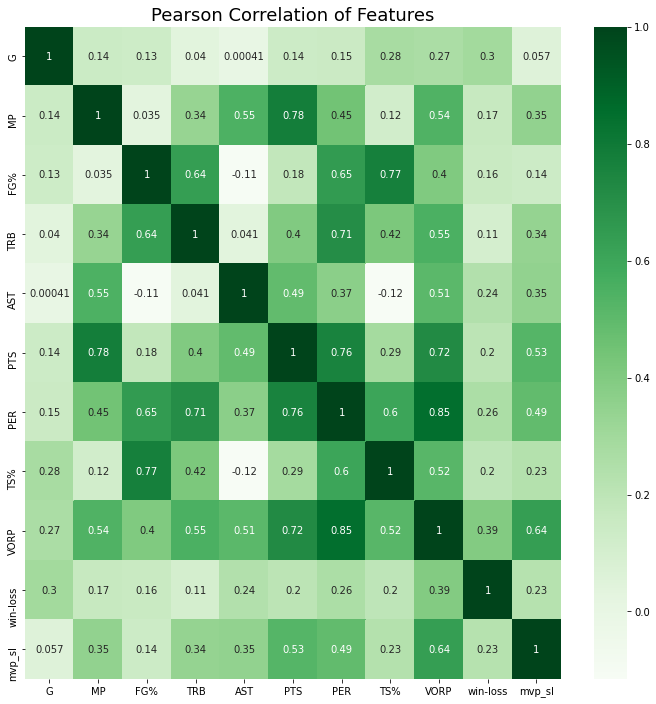

In [273]:
colormap = plt.cm.Greens
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', size=18)
sns.heatmap(df_all_mvp_2019_fil.corr(), cmap=colormap, annot=True)
plt.show();

In [400]:
y = df_all_mvp_2019['mvp_sl']
X = df_all_mvp_2019[['VORP']]

In [401]:
from sklearn.model_selection import train_test_split
import sklearn.metrics

In [402]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [403]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.9849624060150376

In [404]:
y_pred_all = logreg.predict(X)

In [405]:
df_all_test = df_all_mvp_2019.copy()

In [406]:
df_all_test.reset_index(drop=True, inplace=True)

In [407]:
df_all_test2 = df_all_test.merge(pd.DataFrame(y_pred_all, columns=['pred']), left_index=True, right_index=True)

In [408]:
df_sl = df_all_test2[df_all_test2['pred'] == 1].sort_values(by='VORP', ascending=False)

In [410]:
df_sl

,Player,G,MP,FG%,TRB,AST,PTS,PER,TS%,VORP,win-loss,mvp_sl,pred
334,James Harden,78,36.8,0.442,6.6,7.5,36.1,30.6,0.616,9.3,0.646,1.0,1.0
300,Giannis Antetokounmpo,72,32.8,0.578,12.5,5.9,27.7,30.9,0.644,7.4,0.732,1.0,1.0
83,Nikola Jokić,80,31.3,0.511,10.8,7.3,20.1,26.3,0.589,7.0,0.659,1.0,1.0
7,Paul George,77,36.9,0.438,8.2,4.1,28.0,23.3,0.583,6.6,0.598,1.0,1.0
177,Damian Lillard,80,35.5,0.444,4.6,6.9,25.8,23.7,0.588,6.0,0.646,1.0,1.0
370,Nikola Vučević,80,31.4,0.518,12.0,3.8,20.8,25.5,0.573,5.5,0.512,0.0,1.0
479,Anthony Davis,56,33.0,0.517,12.0,3.9,25.9,30.3,0.597,5.3,0.402,0.0,1.0
428,Karl-Anthony Towns,77,33.1,0.518,12.4,3.4,24.4,26.3,0.622,5.1,0.439,0.0,1.0
437,Kyrie Irving,67,33.0,0.487,5.0,6.9,23.8,24.3,0.592,5.1,0.598,0.0,1.0
464,Stephen Curry,69,33.8,0.472,5.3,5.2,27.3,24.4,0.641,5.1,0.695,1.0,1.0


In [ ]:
# end

In [306]:
y_trpred = logreg.predict(X_train)

In [307]:
print(sklearn.metrics.accuracy_score(y_train, y_trpred))
print(sklearn.metrics.f1_score(y_train, y_trpred))
print(sklearn.metrics.recall_score(y_train, y_trpred))
print(sklearn.metrics.precision_score(y_train, y_trpred))

0.9647058823529412
0.25
0.16666666666666666
0.5


In [308]:
y_pred = logreg.predict(X_test)

In [309]:
print(sklearn.metrics.accuracy_score(y_test, y_pred))
print(sklearn.metrics.f1_score(y_test, y_pred))
print(sklearn.metrics.recall_score(y_test, y_pred))
print(sklearn.metrics.precision_score(y_test, y_pred))

0.9649122807017544
0.8
0.6666666666666666
1.0


In [310]:
df_y_pred = pd.DataFrame(y_pred, columns=['pred']).reset_index(drop=True)
df_y_test = y_test.to_frame(name='test').reset_index(drop=True)
df_y = pd.concat([df_y_pred, df_y_test], axis=1)

In [311]:
import sklearn.metrics

In [312]:
y_test[y_test == 1]

83     1.0
464    1.0
177    1.0
7      1.0
334    1.0
407    1.0
Name: mvp_sl, dtype: float64

In [313]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9122807017543859

In [314]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8947368421052632

In [315]:
from sklearn.svm import SVC, LinearSVC

svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

/Users/stephaniezhu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8947368421052632